In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import h5py

## load HDF5 file with context manager

In [5]:
with h5py.File(
    r"kaust_2024.nxs", "r"
) as f:
    # get the data
    data = f[list(f.keys())[0]]["data"]["Simple_Sweep"]
    SMU_mesI1 = data["SMU_mesI1"][:]
    SMU_mesV1 = data["SMU_mesV1"][:]
    SMU_setV1 = data["SMU_setV1"][:]

## Fit the data: a * x + b

In [18]:
fit_result = curve_fit(lambda x, a, b: a * x + b, SMU_mesV1, SMU_mesI1)
a, b = fit_result[0]

## plot the data

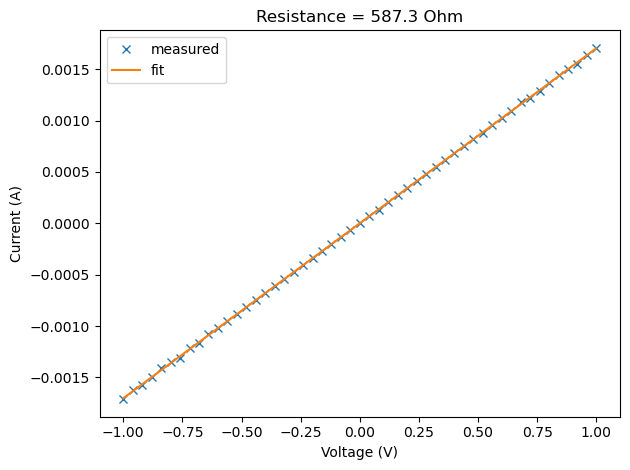

In [19]:
plt.figure()
plt.plot(SMU_mesV1, SMU_mesI1, 'x',label="measured")
plt.plot(SMU_mesV1, a * SMU_mesV1 + b, label="fit")
plt.xlabel("Voltage (V)")
plt.ylabel("Current (A)")
plt.title(f"Resistance = {1/a:.1f} Ohm")
plt.legend()
plt.tight_layout()
